<a href="https://colab.research.google.com/github/TatyanaPythonista/heart_disease/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# Preparation of data

In [ ]:
files.upload()

Saving heart.csv to heart (1).csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [ ]:
data_heart = pd.read_csv('heart.csv')

In [ ]:
data_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data_heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
data_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data_heart.columns = ['age', 'sex', 'chest_pain', 'blood_pressuse', 'cholesterol', 'sugar', 'electrocardiogram', 'heart_rate', 
                      'angina', 'ST_depression', 'ST_slope', 'num_major_vessels', 'thalassemia', 'target'
]

In [ ]:
data_heart.head(10)

,age,sex,chest_pain,blood_pressuse,cholesterol,sugar,electrocardiogram,heart_rate,angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data_heart.dtypes

age                    int64
sex                    int64
chest_pain             int64
blood_pressuse         int64
cholesterol            int64
sugar                  int64
electrocardiogram      int64
heart_rate             int64
angina                 int64
ST_depression        float64
ST_slope               int64
num_major_vessels      int64
thalassemia            int64
target                 int64
dtype: object

In [ ]:
matrix_corr = data_heart.corr()
matrix_corr

,age,sex,chest_pain,blood_pressuse,cholesterol,sugar,electrocardiogram,heart_rate,angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
blood_pressuse,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
electrocardiogram,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
ST_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


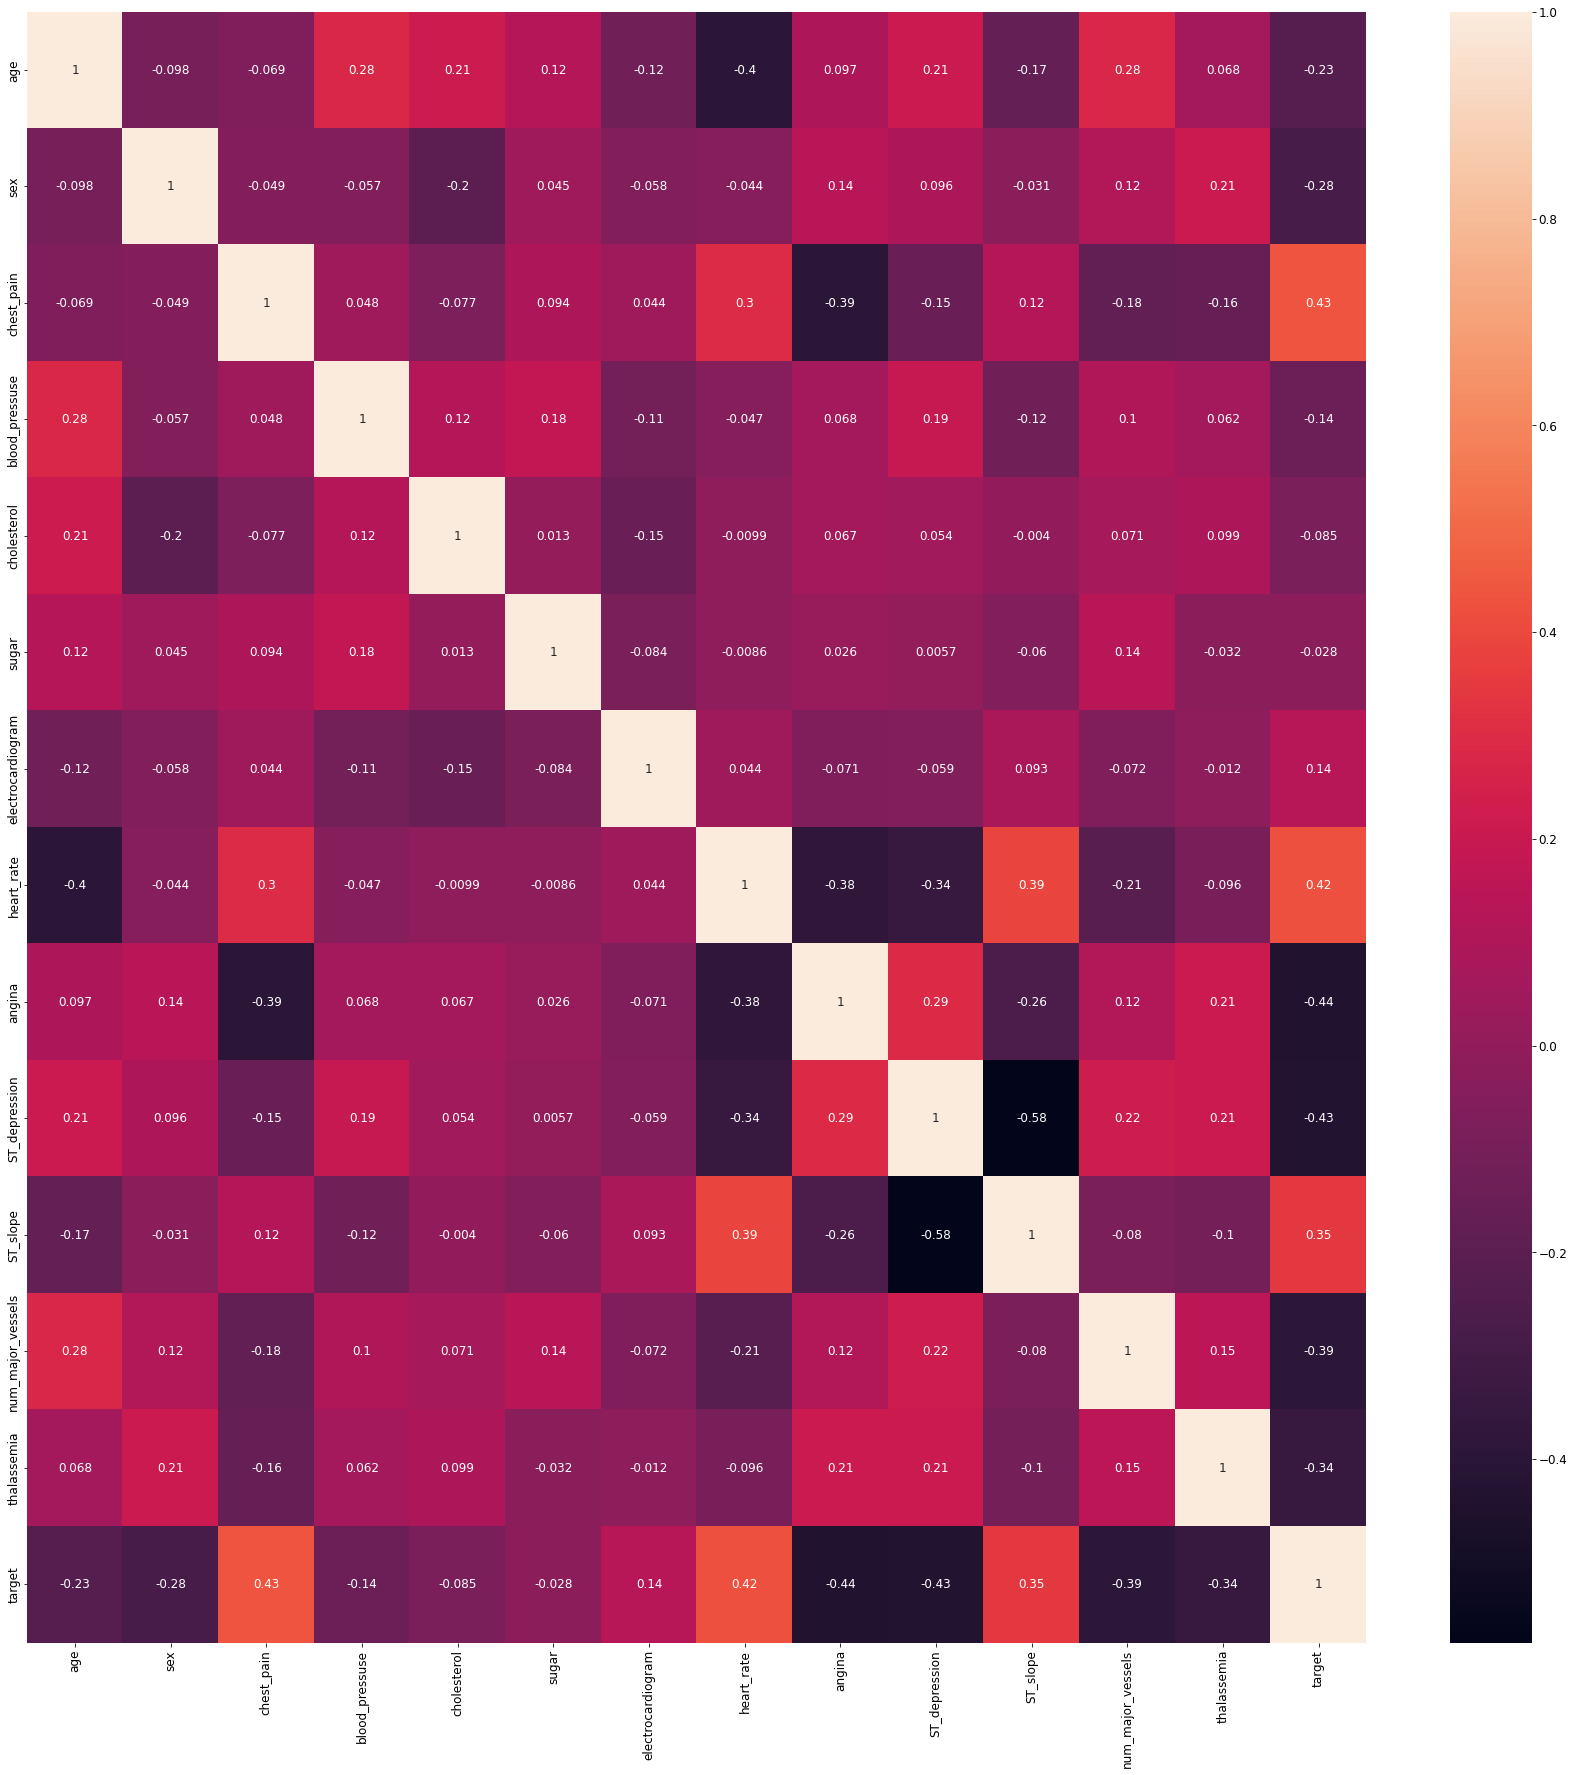

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(matrix_corr, annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab0657bc50>,
      dtype=object)

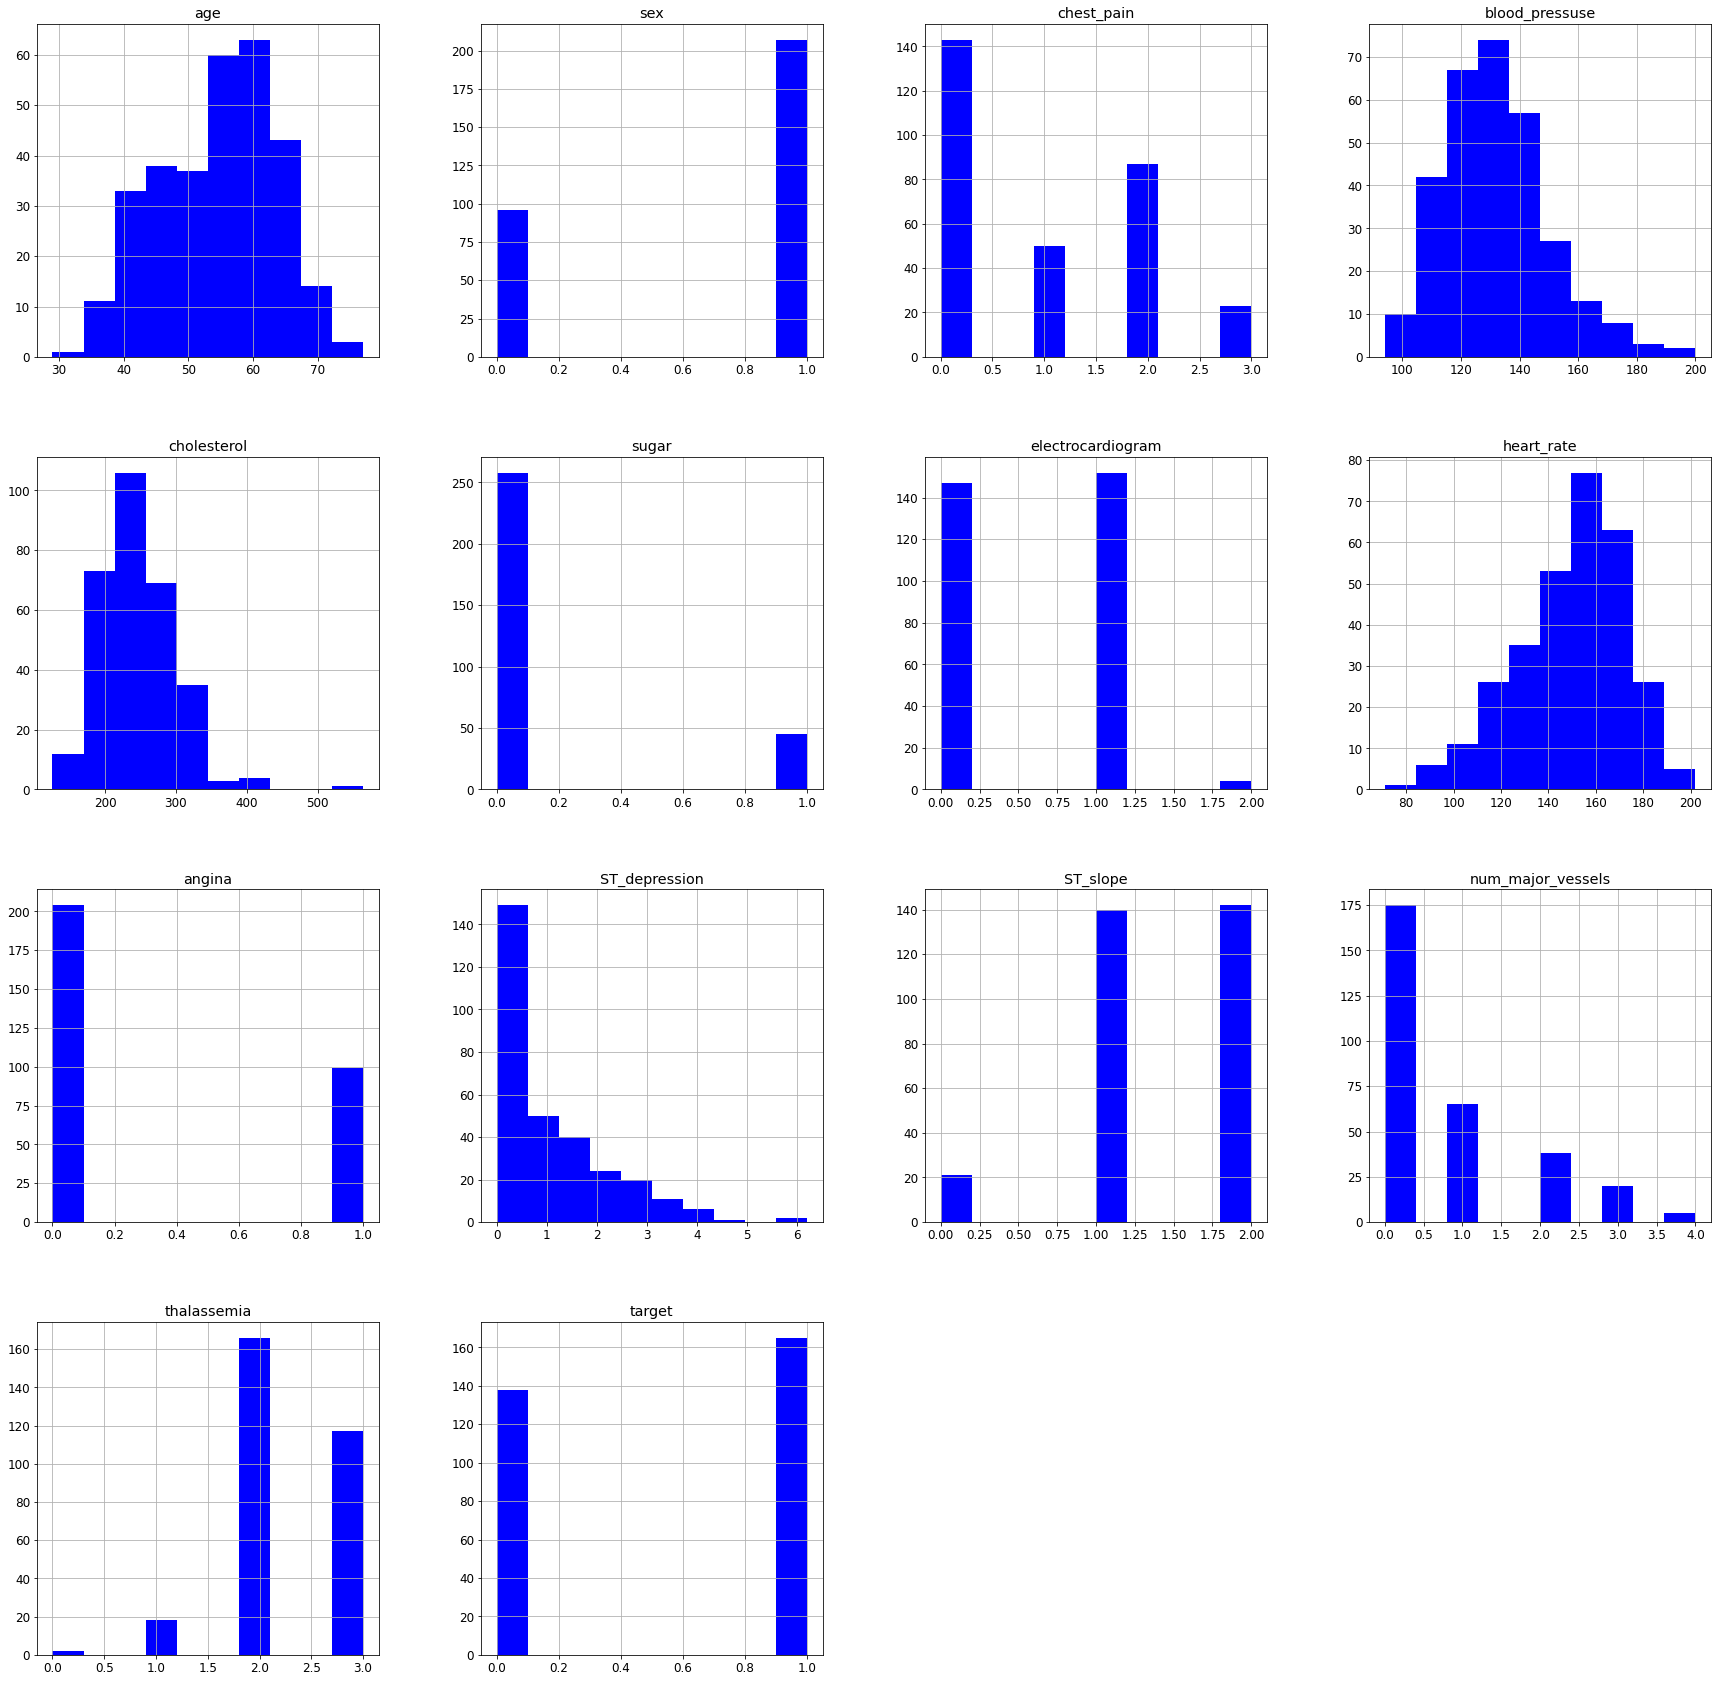

In [ ]:
data_heart.hist(bins=10, figsize=(30, 30), color='b')

In [ ]:
y = data_heart.target
X = data_heart.drop(columns=['target'])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Build XGBoost Classifier

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.001)
parametrs = {'max_depth': range(1, 31), 'n_estimators': range(10, 101, 10)}
grid_search_cv_clf = GridSearchCV(model, parametrs, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(learning_rate=0.001),
             param_grid={'max_depth': range(1, 31),
                         'n_estimators': range(10, 101, 10)})

In [ ]:
grid_search_cv_clf.best_estimator_

XGBClassifier(learning_rate=0.001, n_estimators=10)

In [ ]:
best_model = grid_search_cv_clf.best_estimator_
best_model.score(X_train, y_train)

0.8512396694214877

In [ ]:
best_model.score(X_test, y_test)

0.8032786885245902

In [ ]:
y_predict = best_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



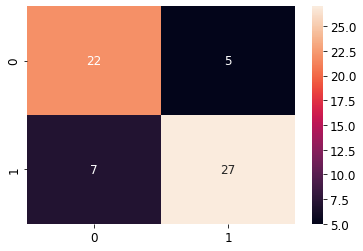

In [ ]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True)

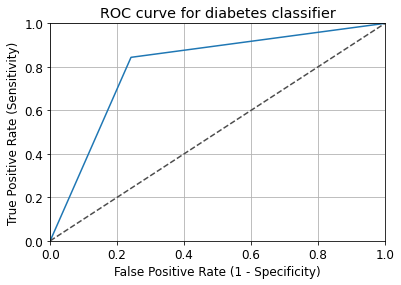

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [ ]:
auc(fpr, tpr)


0.8011853448275861

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = RandomForestClassifier()
parametrs = {'max_depth': range(1, 31), 'n_estimators': range(10, 101, 10)}
grid_search_cv_clf = GridSearchCV(model, parametrs, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 31),
                         'n_estimators': range(10, 101, 10)})

In [ ]:
grid_search_cv_clf.best_estimator_

RandomForestClassifier(max_depth=13, n_estimators=20)

In [ ]:
grid_search_cv_clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator': RandomForestClassifier(),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': None,
 'param_grid': {'max_depth': range(1, 31), 'n_estimators': range(10, 101, 10)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
best_model = grid_search_cv_clf.best_estimator_
best_model.score(X_train, y_train)

1.0

In [ ]:
best_model.score(X_test, y_test)

0.8524590163934426

In [ ]:
y_predict = best_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



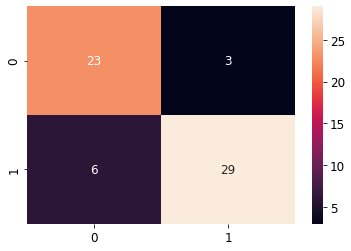

In [ ]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True)

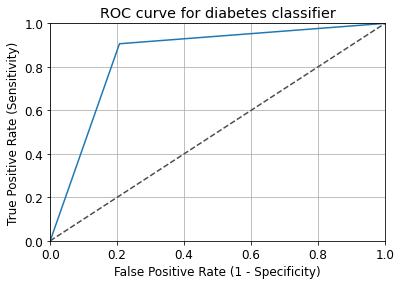

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [ ]:
auc(fpr, tpr)


0.849676724137931

In [ ]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)


Sensitivity :  0.7931034482758621
Specificity :  0.90625


# New Random Forest Classifier after delete several features.

In [ ]:
data_new = data_heart.drop(columns=['cholesterol', 'sugar'])

In [ ]:
y = data_new.target
X = data_new.drop(columns=['target'])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = RandomForestClassifier()
parametrs = {'max_depth': range(1, 31), 'n_estimators': range(10, 101, 10)}
grid_search_cv_clf = GridSearchCV(model, parametrs, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 31),
                         'n_estimators': range(10, 101, 10)})

In [ ]:
best_model = grid_search_cv_clf.best_estimator_
best_model.score(X_train, y_train)

0.9669421487603306

In [ ]:
best_model.score(X_test, y_test)

0.8852459016393442

In [ ]:
y_predict = best_model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        26
           1       0.97      0.83      0.89        35

    accuracy                           0.89        61
   macro avg       0.89      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61



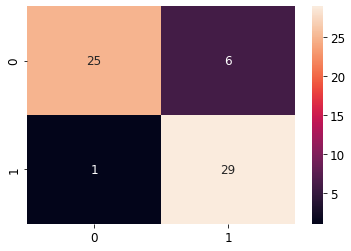

In [ ]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True)

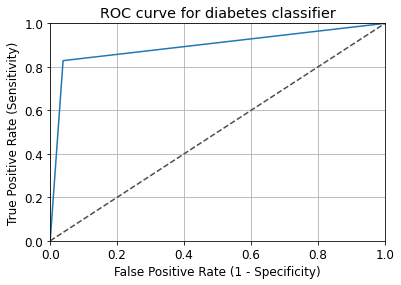

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
auc(fpr, tpr)


0.8950549450549452